Part (c) Results:
New Best Fit Line (without last sample): y = -7.89x + 366.30
Training SSE (without last sample): 1705.33
Test Error (on last sample): 1327.82

Part (d) Results (Scikit-learn):
Best Fit Line: y = -7.28x + 360.64
Training SSE (Scikit-learn): 2531.53


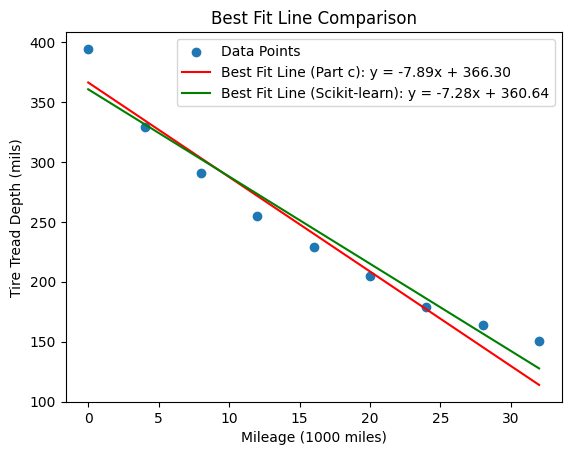

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# The dataset
x = np.array([0, 4, 8, 12, 16, 20, 24, 28, 32])
y = np.array([394.33, 329.50, 291.00, 255.17, 229.33, 204.83, 179.00, 163.83, 150.33])

# Function to compute slope and intercept manually
def compute_best_fit_line(x, y):
    N = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x * y)
    sum_x_squared = np.sum(x ** 2)

    # Calculate slope (m) and intercept (b)
    m = (N * sum_xy - sum_x * sum_y) / (N * sum_x_squared - sum_x ** 2)
    b = (sum_y * sum_x_squared - sum_x * sum_xy) / (N * sum_x_squared - sum_x ** 2)

    return m, b

# Function to compute SSE
def compute_sse(x, y, m, b):
    y_pred = m * x + b
    sse = np.sum((y - y_pred) ** 2)
    return sse

# Part (c) - Leave out the last sample and recompute
x_train = x[:-1]  # Exclude the last point
y_train = y[:-1]

# Recompute slope and intercept
m_new, b_new = compute_best_fit_line(x_train, y_train)

# Compute SSE on the training set (without the last sample)
sse_train = compute_sse(x_train, y_train, m_new, b_new)

# Test error (on the last sample)
x_test = x[-1]  # Last sample
y_test = y[-1]
y_pred_test = m_new * x_test + b_new
test_error = (y_test - y_pred_test) ** 2

print(f"Part (c) Results:")
print(f"New Best Fit Line (without last sample): y = {m_new:.2f}x + {b_new:.2f}")
print(f"Training SSE (without last sample): {sse_train:.2f}")
print(f"Test Error (on last sample): {test_error:.2f}")

# Part (d) - Use Scikit-learn to Compute the Linear Regression
# Train on the entire dataset
x_train_full = x.reshape(-1, 1)  # Reshape to 2D array for Scikit-learn
y_train_full = y

model = LinearRegression()
model.fit(x_train_full, y_train_full)

# Get the slope and intercept from Scikit-learn's model
m_sklearn = model.coef_[0]
b_sklearn = model.intercept_

# Compute SSE on the training data
y_pred_full = model.predict(x_train_full)
sse_sklearn = mean_squared_error(y_train_full, y_pred_full) * len(y_train_full)

print(f"\nPart (d) Results (Scikit-learn):")
print(f"Best Fit Line: y = {m_sklearn:.2f}x + {b_sklearn:.2f}")
print(f"Training SSE (Scikit-learn): {sse_sklearn:.2f}")

# Plot the results
plt.scatter(x, y, label='Data Points')
plt.plot(x, m_new * x + b_new, label=f'Best Fit Line (Part c): y = {m_new:.2f}x + {b_new:.2f}', color='red')
plt.plot(x, m_sklearn * x + b_sklearn, label=f'Best Fit Line (Scikit-learn): y = {m_sklearn:.2f}x + {b_sklearn:.2f}', color='green')
plt.xlabel('Mileage (1000 miles)')
plt.ylabel('Tire Tread Depth (mils)')
plt.legend()
plt.title('Best Fit Line Comparison')
plt.show()